In [1]:

import numpy as np
#@save
import collections
import hashlib
import inspect
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

d2l = sys.modules[__name__]

#@save
import numpy as np
import torch
import torchvision
from PIL import Image
from scipy.spatial import distance_matrix
from torch import nn
from torch.nn import functional as F
from torchvision import transforms

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [3]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [11]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [12]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [13]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [14]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [15]:
x.grad == 4 * x

tensor([True, True, True, True])

In [16]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [17]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [19]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [20]:
a.grad == d / a

tensor(True)

In [23]:
torch.sin(torch.arange(10), requries_grad=True)

TypeError: sin() got an unexpected keyword argument 'requries_grad'

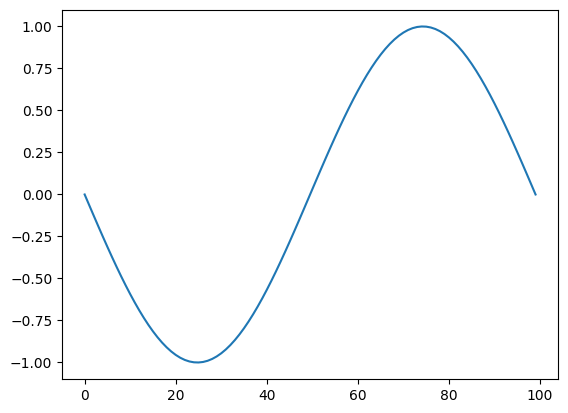

In [27]:
x = np.linspace(- np.pi,np.pi,100)
x = torch.tensor(x, requires_grad=True)

y = torch.sin(x)

y.sum().backward()



plt.plot(y.detach())#,(y.detach(),x.grad),legend = (('sin(x)',"grad w.s.t x")))

In [28]:
x,y

(tensor([-3.1416, -3.0781, -3.0147, -2.9512, -2.8877, -2.8243, -2.7608, -2.6973,
         -2.6339, -2.5704, -2.5069, -2.4435, -2.3800, -2.3165, -2.2531, -2.1896,
         -2.1261, -2.0627, -1.9992, -1.9357, -1.8723, -1.8088, -1.7453, -1.6819,
         -1.6184, -1.5549, -1.4915, -1.4280, -1.3645, -1.3011, -1.2376, -1.1741,
         -1.1107, -1.0472, -0.9837, -0.9203, -0.8568, -0.7933, -0.7299, -0.6664,
         -0.6029, -0.5395, -0.4760, -0.4125, -0.3491, -0.2856, -0.2221, -0.1587,
         -0.0952, -0.0317,  0.0317,  0.0952,  0.1587,  0.2221,  0.2856,  0.3491,
          0.4125,  0.4760,  0.5395,  0.6029,  0.6664,  0.7299,  0.7933,  0.8568,
          0.9203,  0.9837,  1.0472,  1.1107,  1.1741,  1.2376,  1.3011,  1.3645,
          1.4280,  1.4915,  1.5549,  1.6184,  1.6819,  1.7453,  1.8088,  1.8723,
          1.9357,  1.9992,  2.0627,  2.1261,  2.1896,  2.2531,  2.3165,  2.3800,
          2.4435,  2.5069,  2.5704,  2.6339,  2.6973,  2.7608,  2.8243,  2.8877,
          2.9512,  3.0147,  

In [31]:
with torch.no_grad():
    x -= 0.1 * x.grad